In [1]:
# Jerry Liao
# CS230 Final Project
# Typical CNN model

In [1]:
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Dropout
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.models import Model
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [10]:
DATADIR = os.getcwd()
CATEGORIES = ['images/train_cnn_inside', 'images/train_cnn_outside']
IMG_HEIGHT = 914
IMG_WIDTH = 890
CLASS_NUM = 7                                                 # C rate from 0~6
NAME = 'battery_charging_rate_cnn_{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

training_data = []
test_data = []

In [11]:
def create_one_hot_array(number):
    one_hot_array = np.zeros((1, 7))
    one_hot_array[0][int(number)] = 1
    
    return one_hot_array

In [12]:
def load_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            if len(img) > 10:                                     # Get rid of DS.store
                img_array = cv2.imread(os.path.join(path, img))   # The image is BGR instead of RGB
                B, G, R = cv2.split(img_array)                    # Get the BGR values
                RGB_img_array = cv2.merge([R, G, B])              # Convert it to a RGB image 
                RGB_img_array_resized = cv2.resize(RGB_img_array, (IMG_WIDTH, IMG_HEIGHT))
                training_data.append([RGB_img_array_resized, img[0]])
        print(len(training_data))
                
def load_test_data():
    test_path = 'images/test_set'
    path = os.path.join(DATADIR, test_path)
    for img in os.listdir(path):
        if len(img) > 10:
            img_array = cv2.imread(os.path.join(path, img))   # The image is BGR instead of RGB
            B, G, R = cv2.split(img_array)                    # Get the BGR values
            RGB_img_array = cv2.merge([R, G, B])              # Convert it to a RGB image 
            RGB_img_array_resized = cv2.resize(RGB_img_array, (IMG_WIDTH, IMG_HEIGHT))
            test_data.append([RGB_img_array_resized, img[0]])

In [13]:
load_data()
load_test_data()
random.shuffle(training_data)
random.shuffle(test_data)

251
524


In [7]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for img, label in training_data:
    X_train.append(img/255)
    one_hot_label = create_one_hot_array(label)
    Y_train.append(np.transpose(one_hot_label))

for img, label in test_data:
    X_test.append(img/255)
    one_hot_label = create_one_hot_array(label)
    Y_test.append(np.transpose(one_hot_label))  

X_train = np.array(X_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, 3)
Y_train = np.array(Y_train).reshape(-1, 7)
X_test = np.array(X_test).reshape(-1, IMG_HEIGHT, IMG_WIDTH, 3)
Y_test = np.array(Y_test).reshape(-1, 7)

Shape of X_train: (524, 914, 890, 3)
Shape of Y_train: (524, 7)
Shape of img: (914, 890, 3)
Charging rate: [0. 0. 0. 0. 0. 1. 0.]


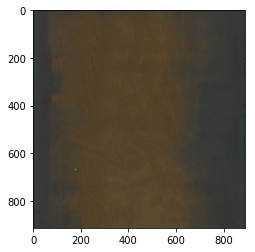

Shape of img: (914, 890, 3)
Charging rate: [0. 0. 0. 1. 0. 0. 0.]


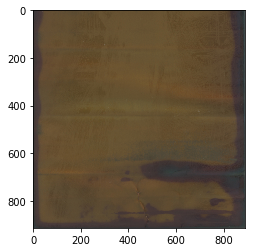

In [8]:
# Sanity check
print ('Shape of X_train: ' + str(X_train.shape))
print ('Shape of Y_train: ' + str(Y_train.shape))
for i in range(2):
    sample = training_data[i][0]
    print ('Shape of img: ' + str(sample.shape))
    print ('Charging rate: '+ str(Y_train[i]))
    plt.imshow(sample)
    plt.show()

In [9]:
def KerasModel(input_shape, classes = 7):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
        
    
    X = Conv2D(8, (2, 2), strides = (2, 2), name = 'conv0', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    X = Dropout(0.2)(X)
    
    X = Conv2D(8, (2, 2), strides = (2, 2), name = 'conv0.5', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = 'bn0.5')(X)
    X = Activation('relu')(X)

    X = Conv2D(16, (2, 2), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    X = Dropout(0.2)(X)
    
    X = Conv2D(16, (2, 2), strides = (2, 2), name = 'conv1.5', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = 'bn1.5')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(32, (2, 2), strides = (2, 2), name = 'conv2', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = Dropout(0.2)(X)
    
    X = Conv2D(32, (2, 2), strides = (2, 2), name = 'conv2.5', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = 'bn2.5')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(64, (2, 2), strides = (2, 2), name = 'conv3', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = Dropout(0.2)(X)
    
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc', kernel_initializer = glorot_uniform())(X)
    
    model = Model(inputs = X_input, outputs = X, name='KerasModel')

    return model

In [10]:
model = KerasModel((914, 890, 3), classes = 7)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 914, 890, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 920, 896, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 460, 448, 8)       104       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 460, 448, 8)       32        
_________________________________________________________________
activation_1 (Activation)    (None, 460, 448, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 230, 224, 8)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 230, 224, 8)       0         
__________

In [11]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x = X_train, y = Y_train, epochs = 1, batch_size = 30, validation_split = 0.1)

Train on 471 samples, validate on 53 samples
Epoch 1/1
471/471 [==============================] - 139s 296ms/step - loss: 0.3837 - acc: 0.8599 - val_loss: 0.5117 - val_acc: 0.8113


Shape of X_test: (100, 914, 890, 3)
Shape of Y_test: (100, 7)
Shape of img: (914, 890, 3)
Charging rate: [0. 0. 0. 0. 1. 0. 0.]


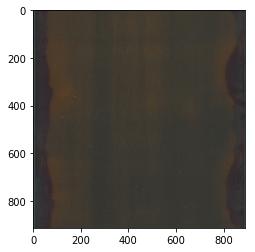

Shape of img: (914, 890, 3)
Charging rate: [0. 0. 0. 0. 1. 0. 0.]


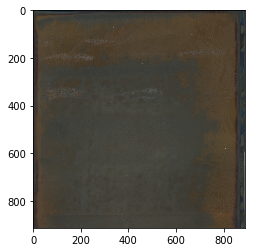

In [43]:
# Sanity check
print ('Shape of X_test: ' + str(X_test.shape))
print ('Shape of Y_test: ' + str(Y_test.shape))
for i in range(2):
    sample = test_data[i][0]
    print ('Shape of img: ' + str(sample.shape))
    print ('Charging rate: '+ str(Y_test[i]))
    plt.imshow(sample)
    plt.show()

In [44]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

100/100 [==============================] - 20s 198ms/step
Loss = 1.3320731735229492
Test Accuracy = 0.62


In [53]:
# The following code is to obtain data for 
# the dot plot I included in the final report 

one_hot_list = []
predictions = []

def print_mislabeled(): 
    arr = model.predict(X_test)
    for array in arr:
        maxEle = np.amax(array)
        for i in range(len(array)):
            if array[i] == maxEle:
                one_hot_list.append(create_one_hot_array(i))
                predictions.append(i)
    one_hot_result = np.array(one_hot_list).reshape(-1, 7)
    mislabeled = np.subtract(Y_test, one_hot_result)
    true_values = []
    for i in Y_test:
        count = 0
        for j in range(len(i)):
            if i[j] != 0:
                count = j
        true_values.append(count)
    three_three = 0
    three_four = 0
    three_five = 0
    three_six = 0

    four_three = 0
    four_four = 0
    four_five = 0
    four_six = 0

    five_three = 0
    five_four = 0
    five_five = 0
    five_six = 0

    six_three = 0
    six_four = 0
    six_five = 0
    six_six = 0

    for i in range(100):
        if true_values[i] == 3:
            if predictions[i] == 3:
                three_three += 1
            if predictions[i] == 4:
                three_four += 1
            if predictions[i] == 5:
                three_five += 1
            if predictions[i] == 6:
                three_six += 1
        if true_values[i] == 4:
            if predictions[i] == 3:
                four_three += 1
            if predictions[i] == 4:
                four_four += 1
            if predictions[i] == 5:
                four_five += 1
            if predictions[i] == 6:
                four_six += 1
        if true_values[i] == 5:
            if predictions[i] == 3:
                five_three += 1
            if predictions[i] == 4:
                five_four += 1
            if predictions[i] == 5:
                five_five += 1
            if predictions[i] == 6:
                five_six += 1
        if true_values[i] == 6:
            if predictions[i] == 3:
                six_three += 1
            if predictions[i] == 4:
                six_four += 1
            if predictions[i] == 5:
                six_five += 1
            if predictions[i] == 6:
                six_six += 1

    print('three_three: ' + str(three_three)) 
    print('three_four: ' + str(three_four))            
    print('three_five: ' + str(three_five))            
    print('three_six: ' + str(three_six))            
    print('four_three: ' + str(four_three)) 
    print('four_four: ' + str(four_four))            
    print('four_five: ' + str(four_five))            
    print('four_six: ' + str(four_six)) 
    print('five_three: ' + str(five_three)) 
    print('five_four: ' + str(five_four))            
    print('five_five: ' + str(five_five))            
    print('five_six: ' + str(five_six)) 
    print('six_three: ' + str(six_three)) 
    print('six_four: ' + str(six_four))            
    print('six_five: ' + str(six_five))            
    print('six_six: ' + str(six_six)) 
    print(mislabeled)
    
    
    return mislabeled

In [54]:
mislabeled = print_mislabeled()

three_three: 24
three_four: 1
three_five: 0
three_six: 0
four_three: 7
four_four: 12
four_five: 6
four_six: 0
five_three: 2
five_four: 0
five_five: 23
five_six: 0
six_three: 0
six_four: 0
six_five: 22
six_six: 3
[[ 0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.

In [55]:
def show_mislabeled():
    mislabeled_index = []
    for i in range(len(mislabeled)):
        num_of_zero = 0
        for ele in mislabeled[i]:
            if ele == 0:
                num_of_zero += 1
        if num_of_zero != 7:
            mislabeled_index.append(i)
    for index in mislabeled_index:
        sample = test_data[index][0]
        plt.imshow(sample)
        plt.show()

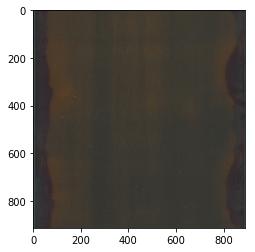

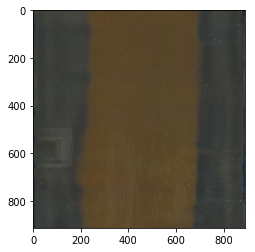

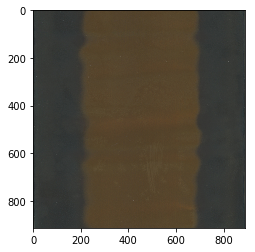

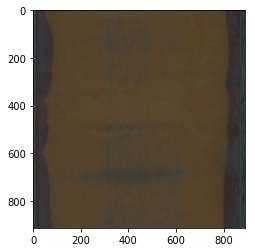

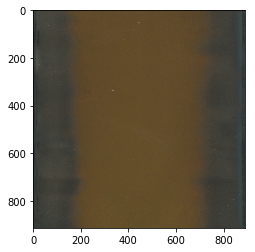

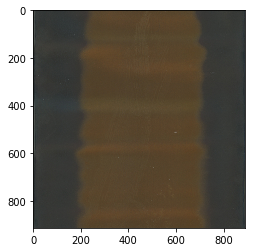

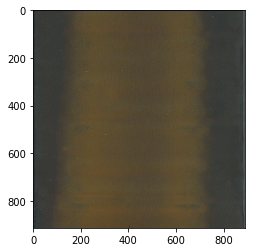

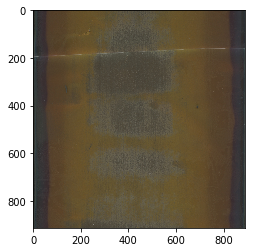

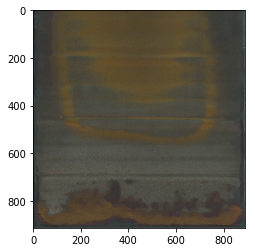

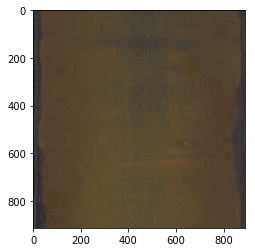

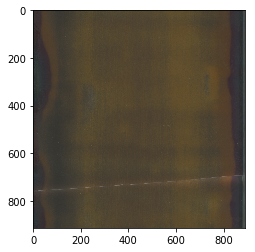

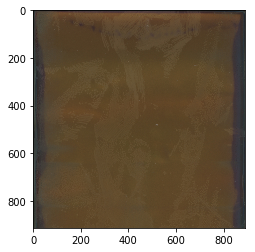

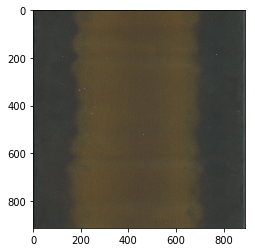

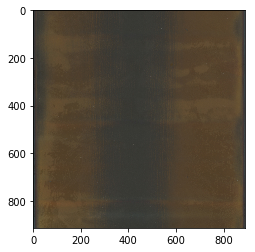

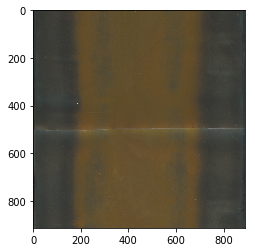

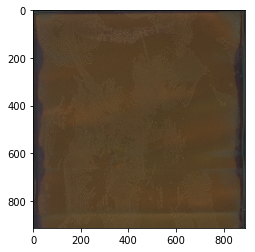

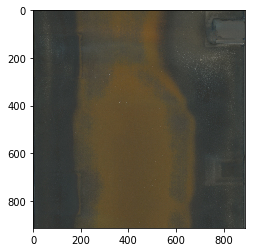

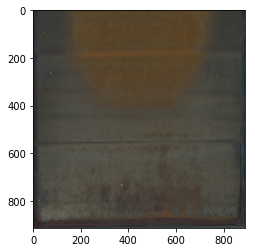

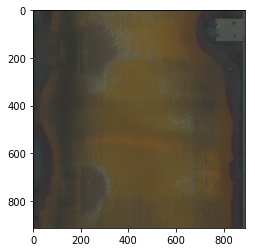

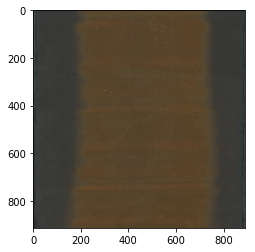

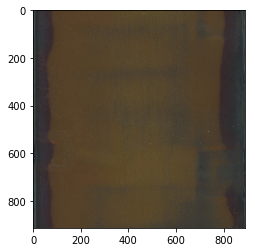

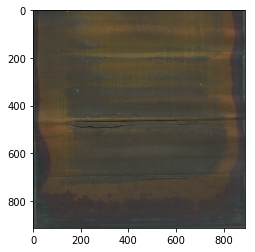

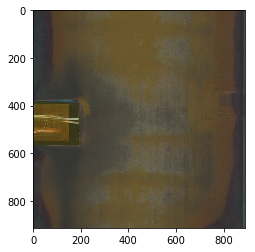

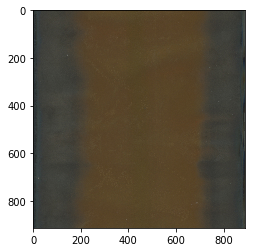

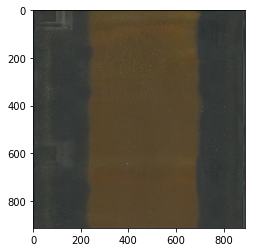

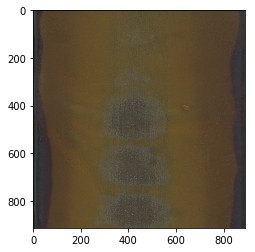

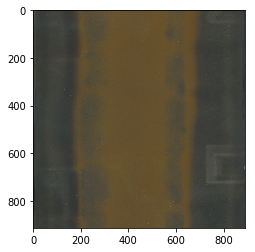

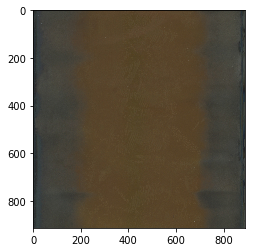

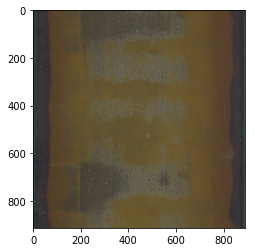

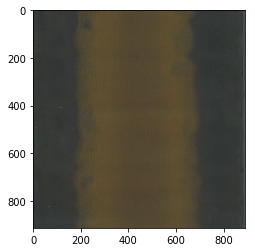

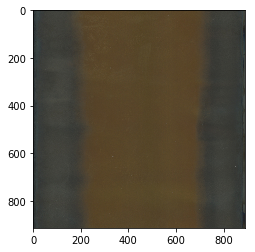

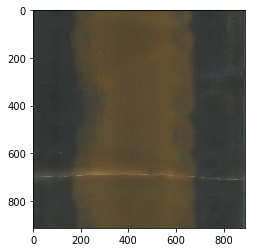

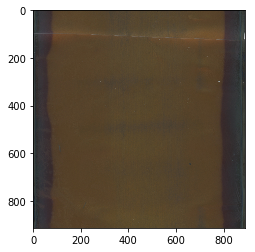

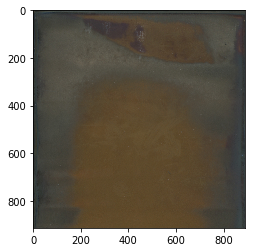

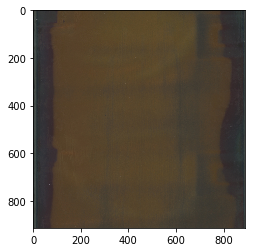

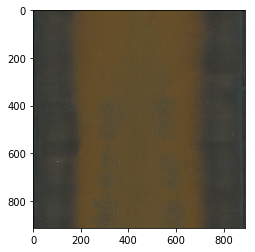

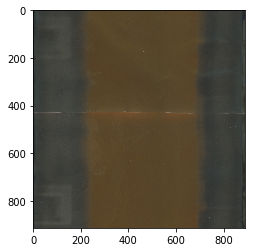

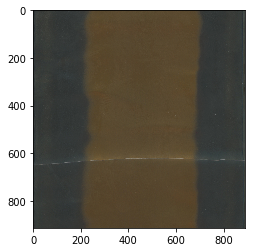

In [56]:
show_mislabeled()